In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get data and preprocess
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [76]:
def plot_input_img(i):
	plt.imshow(X_train[i], cmap='binary')
	plt.title(y_train[i])
	plt.show()

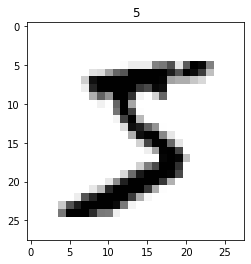

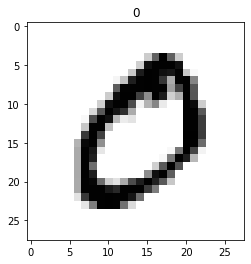

In [77]:
for i in range(2):
	plot_input_img(i)

In [3]:
# Pre process images
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Expand dimensions
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
def create_models():
	models = tf.keras.models.Sequential([
		tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
		tf.keras.layers.MaxPool2D((2, 2)),
		tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
		tf.keras.layers.MaxPool2D((2, 2)),
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dropout(0.25),
		tf.keras.layers.Dense(10, activation='softmax')
	])

	models.compile(optimizer='adam',
		loss=tf.keras.losses.categorical_crossentropy,
		metrics=['accuracy']
	)

	return models

In [6]:
model = create_models()

2022-05-25 13:46:21.523201: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint('./model.h5', monitor='val_acc', verbose=1, save_best_only=True)

cb = [es, mc]

In [8]:
his = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss was: {loss*100} %')
print(f'Accuracy was: {accuracy*100} %')

Epoch 1/10
1313/1313 [==============================] - 27s 19ms/step - loss: 0.2158 - accuracy: 0.9346 - val_loss: 0.0735 - val_accuracy: 0.9783
Epoch 2/10
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.0558 - val_accuracy: 0.9832
Epoch 3/10
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0534 - accuracy: 0.9832 - val_loss: 0.0481 - val_accuracy: 0.9849
Epoch 4/10
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0423 - val_accuracy: 0.9871
Epoch 5/10
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 6/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0452 - val_accuracy: 0.9870
Epoch 7/10
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0275 - accuracy: 0.9906 - val_loss: 0.0412 -

In [9]:
model.save('./model.h5')